<a href="https://colab.research.google.com/github/gunjan1315/Projects/blob/main/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
train_data = pd.read_csv('/content/Train.csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

print("Shape of X after separating features:", X.shape)

Shape of train_data: (9170, 785)
Shape of X after separating features: (9170, 784)


In [3]:
if not isinstance(X, pd.DataFrame):
  X = pd.DataFrame(X)
X= X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values /255.0
X=X.reshape(-1,28,28,1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (9170, 28, 28, 1)


In [4]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (9170, 10)


In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (7336, 28, 28, 1)


In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7324 - loss: 0.9495 - val_accuracy: 0.8997 - val_loss: 0.3150
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9241 - loss: 0.2506 - val_accuracy: 0.9182 - val_loss: 0.2509
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9475 - loss: 0.1715 - val_accuracy: 0.9308 - val_loss: 0.2086
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9671 - loss: 0.1144 - val_accuracy: 0.9215 - val_loss: 0.2292
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9816 - loss: 0.0733 - val_accuracy: 0.9373 - val_loss: 0.2148
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9840 - loss: 0.0633 - val_accuracy: 0.9378 - val_loss: 0.1975
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9897 - loss: 0.0386 - val_accuracy: 0.9427 - val_loss: 0.1818
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9922 - loss: 0.0379 - val_accuracy: 0.

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9204 - loss: 0.2702
Validation Accuracy: 93.40%


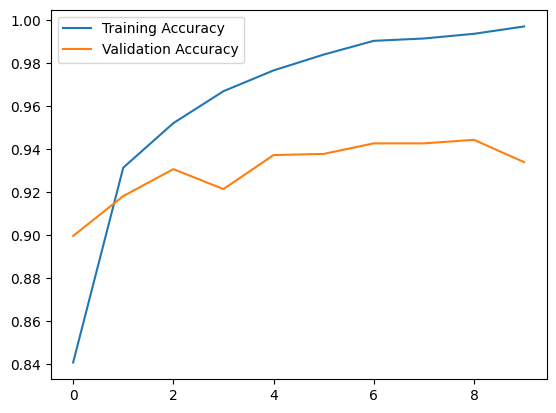

In [8]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


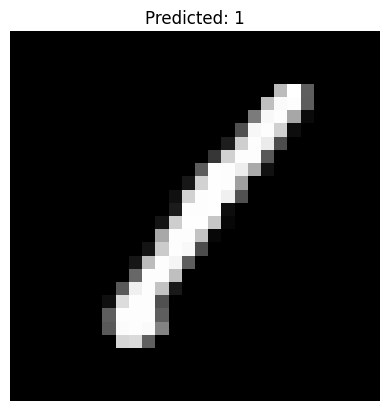

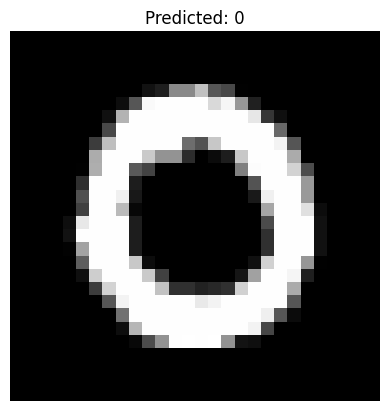

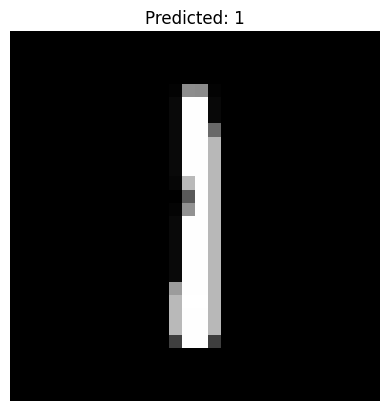

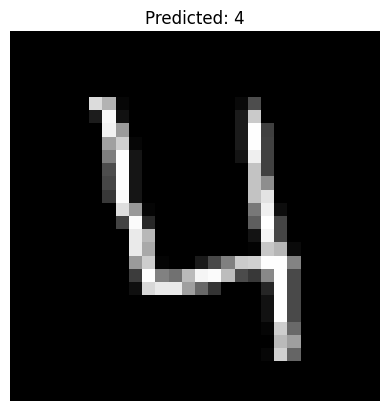

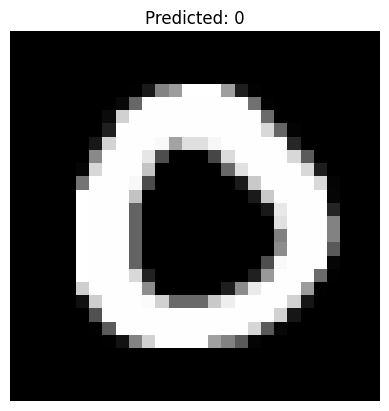

In [11]:
test_data = pd.read_csv('/content/Train.csv')
# Exclude the 'label' column from the test data
X_test = test_data.iloc[:, 1:].values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()